In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
train = pd.read_csv('train.csv')

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [102]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# EDA

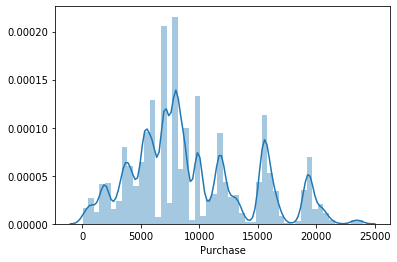

In [103]:
sns.distplot(train['Purchase'])

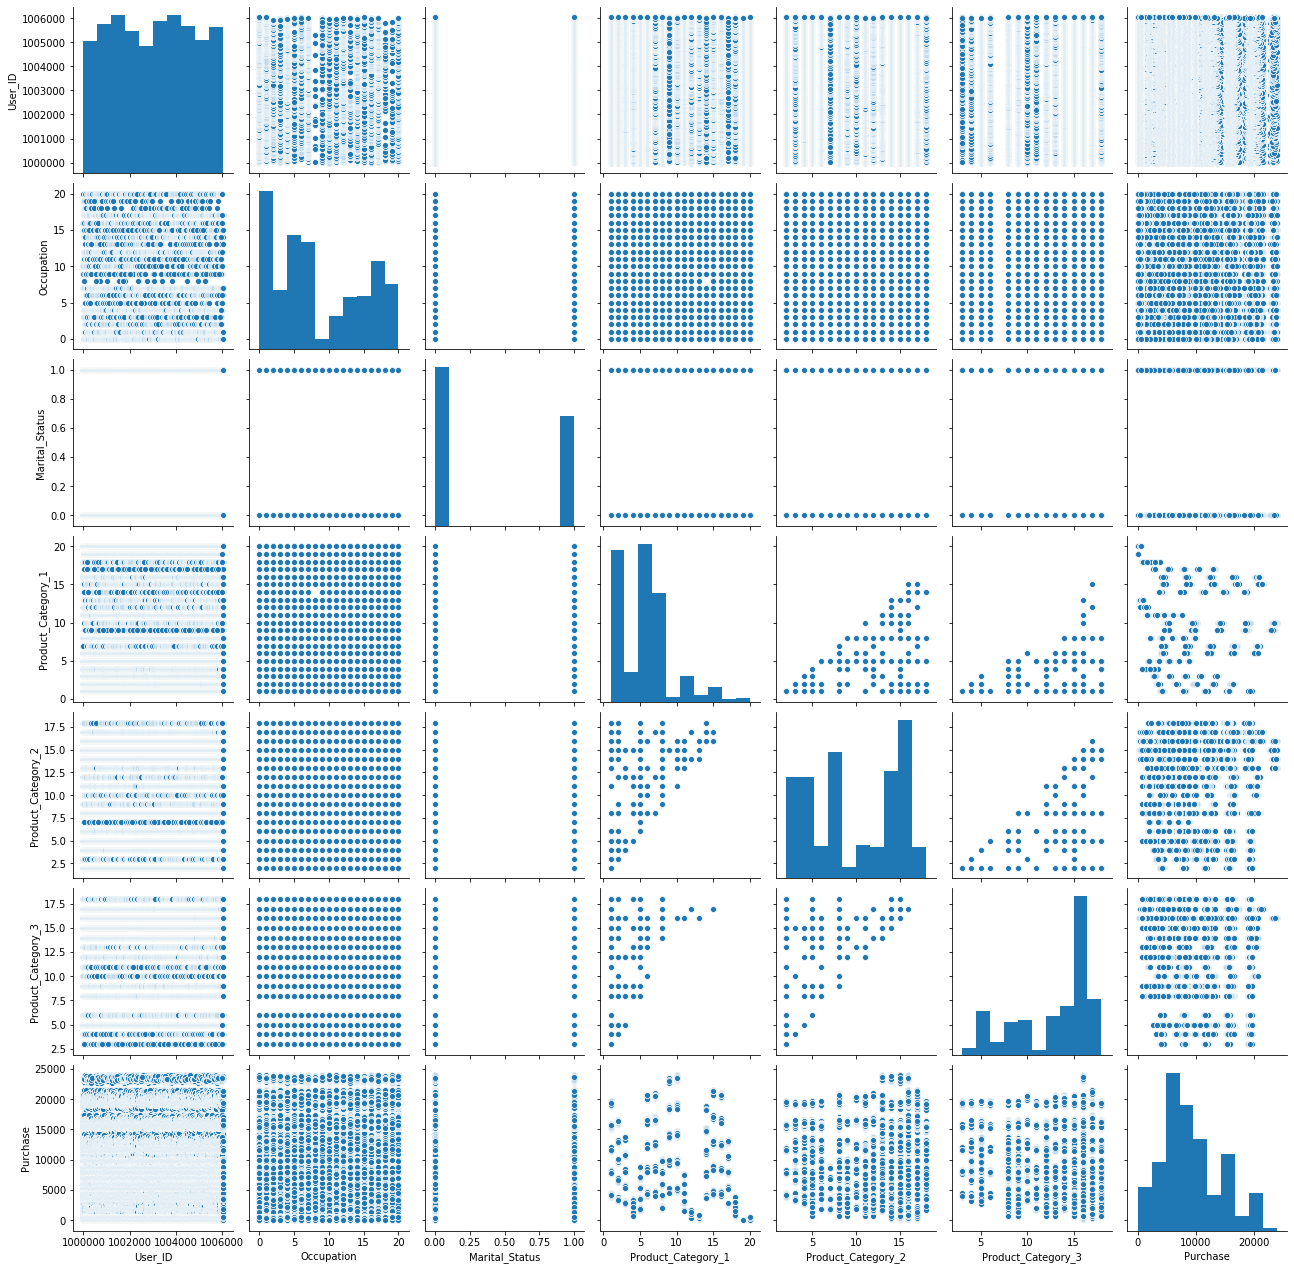

In [6]:
sns.pairplot(train)

In [104]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

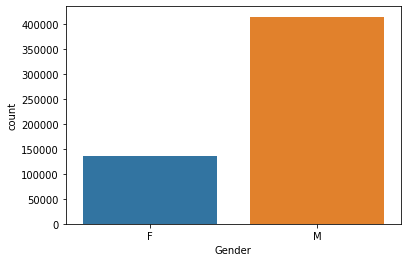

In [105]:
sns.countplot(x = train['Gender'])

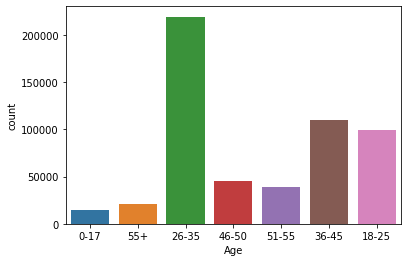

In [106]:
sns.countplot(x = train['Age'])

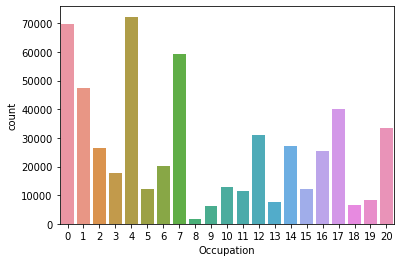

In [107]:
sns.countplot(train['Occupation'])

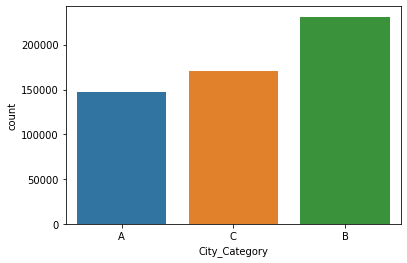

In [108]:
sns.countplot(train['City_Category'])

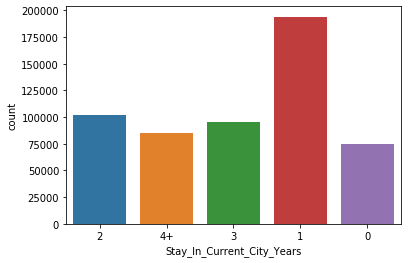

In [109]:
sns.countplot(train['Stay_In_Current_City_Years'])

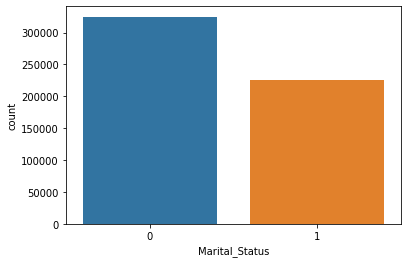

In [110]:
sns.countplot(train['Marital_Status'])

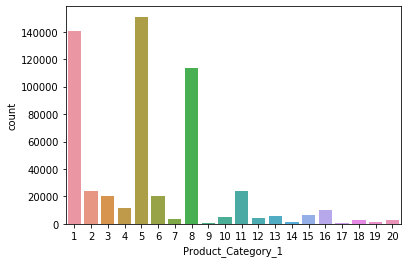

In [111]:
sns.countplot(train['Product_Category_1'])

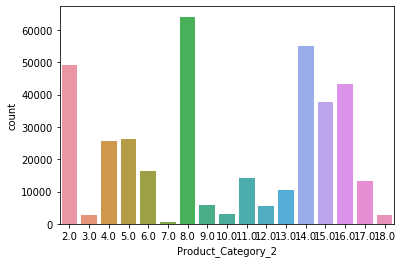

In [112]:
sns.countplot(train['Product_Category_2'])

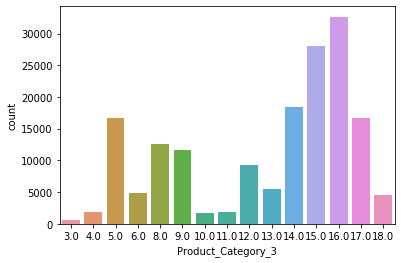

In [113]:
sns.countplot(train['Product_Category_3'])

In [114]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [115]:
train['Product_Category_2'].fillna((train['Product_Category_2'].mode()[0]),inplace = True)

In [116]:
train['Product_Category_3'].fillna((train['Product_Category_3'].mode()[0]),inplace = True)

In [117]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [119]:
train_dummies = pd.get_dummies(train[['Gender','Age','City_Category']],drop_first=True)

In [120]:
train = pd.concat([train,train_dummies],axis = 1)

In [121]:
train = train.drop(['Gender','Age','City_Category'],axis = 1)

In [122]:
train.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,1000001,P00069042,10,2,0,3,8.0,16.0,8370,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,2,0,12,8.0,16.0,1422,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,2,0,12,14.0,16.0,1057,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,4+,0,8,8.0,16.0,7969,1,0,0,0,0,0,1,0,1


In [123]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(lambda x : 4 if(x == '4+') else x)

In [124]:
train = train.drop(['User_ID','Product_ID'],axis = 1)

In [125]:
train.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,10,2,0,3,8.0,16.0,8370,0,0,0,0,0,0,0,0,0
1,10,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0
2,10,2,0,12,8.0,16.0,1422,0,0,0,0,0,0,0,0,0
3,10,2,0,12,14.0,16.0,1057,0,0,0,0,0,0,0,0,0
4,16,4,0,8,8.0,16.0,7969,1,0,0,0,0,0,1,0,1


In [126]:
X = train.drop('Purchase',axis = 1)

In [127]:
y = train['Purchase']

# Train Data Train-Test Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

# Test Data Preprocessing

In [161]:
test = pd.read_csv('test.csv')

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [163]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [164]:
test['Product_Category_2'].fillna((test['Product_Category_2'].mode()[0]),inplace = True)

In [165]:
test['Product_Category_3'].fillna((test['Product_Category_3'].mode()[0]),inplace = True)

In [166]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [167]:
test_dummies = pd.get_dummies(test[['Gender','Age','City_Category']],drop_first=True)

In [168]:
test = pd.concat([test,test_dummies],axis = 1)

In [169]:
test = test.drop(['Gender','Age','City_Category'],axis = 1)

In [170]:
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].apply(lambda x : 4 if(x == '4+') else x)

In [171]:
actual_test = test.drop(['User_ID','Product_ID'],axis = 1)

In [172]:
actual_test.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,7,2,1,1,11.0,16.0,1,0,0,0,1,0,0,1,0
1,17,0,0,3,5.0,16.0,1,0,1,0,0,0,0,0,1
2,1,4,1,5,14.0,16.0,0,0,0,1,0,0,0,1,0
3,1,4,1,4,9.0,16.0,0,0,0,1,0,0,0,1,0
4,1,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1


# Linear Regression - Train Data

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lm = LinearRegression()

In [144]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
train_predict = lm.predict(X_test)

In [147]:
train_predict

array([ 8190.63682601,  8431.20566332,  7582.73298275, ...,
        6962.130225  ,  7293.63062589, 10960.39806971])

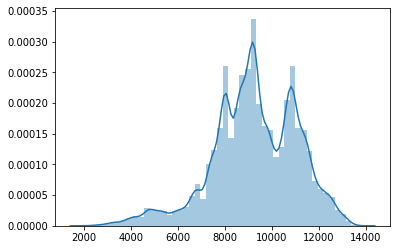

In [149]:
sns.distplot(train_predict)

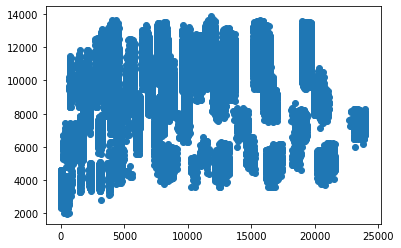

In [150]:
plt.scatter(y_test,train_predict)

In [151]:
from sklearn import metrics

In [152]:
print('MAE :', metrics.mean_squared_error(y_test,train_predict))
print('MSE :', metrics.mean_squared_error(y_test,train_predict))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,train_predict)))

MAE : 21868862.228634637
MSE : 21868862.228634637
RMSE :  4676.415532075249


# Linear regression - Test Data

In [173]:
test_prediction = lm.predict(actual_test)

In [174]:
test_prediction

array([10922.68728102, 10652.1338034 ,  8803.23563773, ...,
       11027.21384206,  7357.98738659,  9203.20391764])

In [175]:
df = pd.DataFrame(test_prediction,columns = ['Purchase'])

In [176]:
test = pd.concat([test,df],axis = 1)

In [177]:
test.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Purchase
0,1000004,P00128942,7,2,1,1,11.0,16.0,1,0,0,0,1,0,0,1,0,10922.687281
1,1000009,P00113442,17,0,0,3,5.0,16.0,1,0,1,0,0,0,0,0,1,10652.133803
2,1000010,P00288442,1,4,1,5,14.0,16.0,0,0,0,1,0,0,0,1,0,8803.235638
3,1000010,P00145342,1,4,1,4,9.0,16.0,0,0,0,1,0,0,0,1,0,9215.853267
4,1000011,P00053842,1,1,0,4,5.0,12.0,0,0,1,0,0,0,0,0,1,10273.220952


In [178]:
result = test[['Purchase','User_ID','Product_ID']]

In [179]:
result.head()

,Purchase,User_ID,Product_ID
0,10922.687281,1000004,P00128942
1,10652.133803,1000009,P00113442
2,8803.235638,1000010,P00288442
3,9215.853267,1000010,P00145342
4,10273.220952,1000011,P00053842


In [181]:
result.to_csv('result.csv',index = False)